In [1]:
# Here we are writting a Quantum Teleportation code using Numpy, without using any Quantum Gates and we will represent them in Bloch and Vectors towards the end

In [35]:
import numpy as np

In [36]:
# Define basis states
zero = np.array([1, 0])
one = np.array([0, 1])

In [37]:
# Define alpha and beta for arbitrary state |ψ⟩ = α|0⟩ + β|1⟩
alpha = 1/np.sqrt(3)
beta = np.sqrt(2/3)
psi = alpha * zero + beta * one  # Qubit to be teleported

In [38]:
# Define gates
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
X = np.array([[0, 1], [1, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.eye(2)

In [39]:
# Tensor product function
def kron(*args):
    result = np.array([1])
    for op in args:
        result = np.kron(result, op)
    return result

In [40]:
# Initial state: |ψ⟩ ⊗ |0⟩ ⊗ |0⟩ (Alice's qubit + EPR pair)
initial = kron(psi, zero, zero)

In [41]:
# Step 1: Create Bell pair between qubit 1 and 2 (shared between Alice and Bob)
# Apply H on qubit 1 and CNOT (1->2)
H1 = kron(I, H, I)
CNOT_12 = np.eye(8)
CNOT_12[[2, 3, 6, 7], :] = CNOT_12[[3, 2, 7, 6], :]  # manually swapped control-target
state_after_bell = CNOT_12 @ H1 @ initial

In [42]:
# Step 2: Entangle Alice’s ψ (qubit 0) with qubit 1 using CNOT and H
CNOT_01 = np.eye(8)
CNOT_01[[1, 3, 5, 7], :] = CNOT_01[[3, 1, 7, 5], :]  # control = qubit 0, target = qubit 1
H0 = kron(H, I, I)
state_before_measurement = H0 @ CNOT_01 @ state_after_bell

In [43]:
# Step 3: Measure qubits 0 and 1 (simulate all outcomes)
# These are the basis vectors for the 2-bit measurement outcomes
measurement_results = {
    '00': kron(zero, zero),
    '01': kron(zero, one),
    '10': kron(one, zero),
    '11': kron(one, one)
}

In [44]:
# Project to each outcome
print("Measurement Outcomes (in decimal) and Resulting Bob's State:")
for bits, proj in measurement_results.items():
    projector = kron(proj, I)  # Only apply projection on qubits 0 and 1
    projected_state = projector @ state_before_measurement
    norm = np.linalg.norm(projected_state)
    if norm > 1e-6:
        normalized = projected_state / norm

        # Find all basis indices consistent with measurement outcome
        # i.e., which 3-qubit basis states start with `bits` (like '01*')
        bob_state = np.zeros(2, dtype=complex)
        for i in range(8):
            b = format(i, '03b')  # 3-bit string like '010'
        if b[:2] == bits:
            bob_state[int(b[2])] = normalized[i]

        # Apply correction depending on the measurement
        correction = I
        if bits == '01':
            correction = X
        elif bits == '10':
            correction = Z
        elif bits == '11':
            correction = X @ Z

        corrected_state = correction @ bob_state
        dec_outcome = int(bits, 2)
        print(f"\nMeasurement (decimal): {dec_outcome}")
        print(f"Bob's state before correction: {np.round(bob_state, 3)}")
        print(f"Corrected state: {np.round(corrected_state, 3)}")

Measurement Outcomes (in decimal) and Resulting Bob's State:

Measurement (decimal): 0
Bob's state before correction: [0.+0.j 0.+0.j]
Corrected state: [0.+0.j 0.+0.j]

Measurement (decimal): 2
Bob's state before correction: [0.+0.j 0.+0.j]
Corrected state: [0.+0.j 0.+0.j]


In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Pauli matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])





In [46]:
def bloch_vector(state):
    """Compute the Bloch vector from a 2D complex state vector."""
    rho = np.outer(state, state.conj())
    x = np.real(np.trace(rho @ X))
    y = np.real(np.trace(rho @ Y))
    z = np.real(np.trace(rho @ Z))
    return np.array([x, y, z])



In [49]:
def plot_bloch_vector(state, title="Bloch Sphere Representation"):
    """Plot the Bloch vector of a quantum state."""
    vector = bloch_vector(state)
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Draw the Bloch Sphere surface
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    xs = np.cos(u) * np.sin(v)
    ys = np.sin(u) * np.sin(v)
    zs = np.cos(v)
    ax.plot_surface(xs, ys, zs, color='lightblue', alpha=0.1)

    # Draw the vector
    ax.quiver(0, 0, 0, *vector, color='darkred', linewidth=2)

    # Axis settings
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Add gridlines for better context
    ax.grid(True)

    plt.tight_layout()
    plt.show()

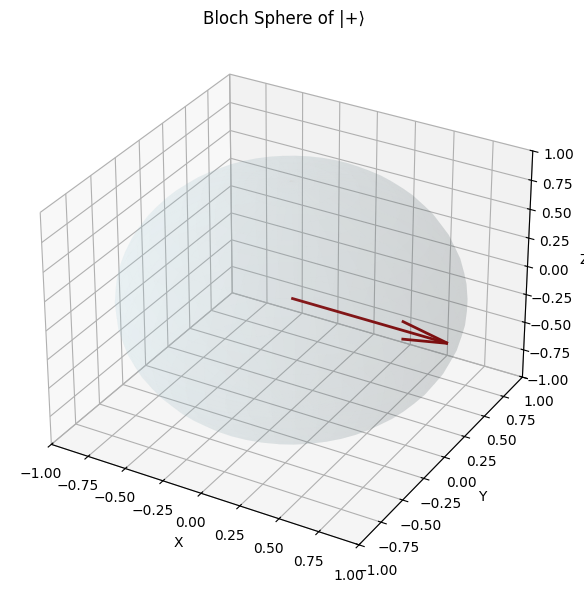

In [50]:
# Example usage:
# This is the state |+> = (|0⟩ + |1⟩) / √2
example_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
plot_bloch_vector(example_state, title="Bloch Sphere of |+⟩")